In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
#Nombramos a nuestro data set como df_sismos, los datos inician en la fila 4
df_sismos = pd.read_csv('/content/drive/MyDrive/Proyecto_DEVF_Sismos/SSNMX_catalogo_19891231_20220902.csv',header = 4)
df_sismos.tail(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
236588,2022-09-02,04:29:19,3.3,19.58,-104.31,86.0,"14 km al ESTE de CASIMIRO CASTILLO, JAL",2022-09-02,09:29:19,verificado
236589,2022-09-02,04:51:00,3.5,16.75,-99.47,8.0,"9 km al SUROESTE de SAN MARCOS, GRO",2022-09-02,09:51:00,verificado
236590,2022-09-02,04:56:45,3.5,16.13,-97.52,12.0,"16 km al NOROESTE de RIO GRANDE, OAX",2022-09-02,09:56:45,verificado
236591,Fecha y hora local en tiempo del centro de Mex...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236592,La localizacion es solo una referencia a una l...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236593,Los registros con estatus verificado son los c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236594,Los registros obtienen estatus revisado cuando...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236595,Esta informacion puede ser reproducida con fin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236596,Consulta nuestro Aviso Legal y Terminos de Uso...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236597,www.ssn.unam.mx | contacto@sismologico.unam.mx...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
#En respuesta al código anterior vemos que las ultimas filas no corresponden a datos, procedemos a eliminarlos
df_sismos.drop(range(236591,236598), axis = 0,inplace=True)
df_sismos

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,1990-01-02,02:27:11,3.7,16.24,-95.72,15.0,"52 km al OESTE de TEHUANTEPEC, OAX",1990-01-02,08:27:11,revisado
1,1990-01-02,16:16:27,3.8,17.09,-100.05,80.0,"10 km al NORESTE de COYUCA DE BENITEZ, GRO",1990-01-02,22:16:27,revisado
2,1990-01-03,08:37:55,3.7,18.32,-100.87,8.0,"22 km al OESTE de CD ALTAMIRANO, GRO",1990-01-03,14:37:55,revisado
3,1990-01-03,12:12:40,3.9,17.39,-94.50,140.0,"67 km al SUR de MINATITLAN, VER",1990-01-03,18:12:40,revisado
4,1990-01-03,22:24:09,4.3,15.04,-91.85,106.0,"34 km al ESTE de CACAHOATAN, CHIS",1990-01-04,04:24:09,revisado
...,...,...,...,...,...,...,...,...,...,...
236586,2022-09-02,04:21:21,3.9,16.51,-94.60,107.0,"25 km al ESTE de UNION HIDALGO, OAX",2022-09-02,09:21:21,verificado
236587,2022-09-02,04:22:09,3.1,30.96,-115.33,12.0,"47 km al OESTE de SAN FELIPE, BC",2022-09-02,09:22:09,verificado
236588,2022-09-02,04:29:19,3.3,19.58,-104.31,86.0,"14 km al ESTE de CASIMIRO CASTILLO, JAL",2022-09-02,09:29:19,verificado
236589,2022-09-02,04:51:00,3.5,16.75,-99.47,8.0,"9 km al SUROESTE de SAN MARCOS, GRO",2022-09-02,09:51:00,verificado


In [103]:
#Aquí tenemos la información del tipo de datos de las columnas 
df_sismos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236591 entries, 0 to 236590
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Fecha                       236591 non-null  object 
 1   Hora                        236591 non-null  object 
 2   Magnitud                    236591 non-null  object 
 3   Latitud                     236591 non-null  float64
 4   Longitud                    236591 non-null  float64
 5   Profundidad                 236591 non-null  object 
 6   Referencia de localizacion  236591 non-null  object 
 7   Fecha UTC                   236591 non-null  object 
 8   Hora UTC                    236591 non-null  object 
 9   Estatus                     236591 non-null  object 
dtypes: float64(2), object(8)
memory usage: 19.9+ MB


In [104]:
#Empezamos a cambiar los tipos de datos que tenemos
df_sismos['Fecha'] = pd.to_datetime(df_sismos['Fecha'], infer_datetime_format=True)
df_sismos['Fecha UTC'] = pd.to_datetime(df_sismos['Fecha UTC'], infer_datetime_format=True)
df_sismos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236591 entries, 0 to 236590
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Fecha                       236591 non-null  datetime64[ns]
 1   Hora                        236591 non-null  object        
 2   Magnitud                    236591 non-null  object        
 3   Latitud                     236591 non-null  float64       
 4   Longitud                    236591 non-null  float64       
 5   Profundidad                 236591 non-null  object        
 6   Referencia de localizacion  236591 non-null  object        
 7   Fecha UTC                   236591 non-null  datetime64[ns]
 8   Hora UTC                    236591 non-null  object        
 9   Estatus                     236591 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 19.9+ MB


In [105]:
#El siguiente código esta comentado porque genera un error
# al tratar de convertir a flotante hay un valores que no lo permiten 'no calculable'
# df_sismos['Magnitud'].astype('float64')

In [106]:
#Nos interesa saber cuantos datos son para saber que es más considerable hacer con ellos
print(len(df_sismos[df_sismos['Magnitud'] == 'no calculable']))
df_sismos[df_sismos['Magnitud'] == 'no calculable']

44


,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
616,1990-09-26,18:53:43,no calculable,31.8000,-115.7300,10.0,"80 km al ESTE de RODOLFO SANCHEZ T(MRO), BC",1990-09-27,00:53:43,revisado
1017,1991-04-03,22:21:27,no calculable,15.3800,-98.1100,33.0,"101 km al SUROESTE de RIO GRANDE, OAX",1991-04-04,04:21:27,revisado
1226,1991-07-04,05:20:30,no calculable,30.4100,-113.7500,10.0,"103 km al SUR de PUERTO PEÑASCO, SON",1991-07-04,11:20:30,revisado
1437,1991-11-15,21:39:01,no calculable,25.9200,-100.4300,5.0,"6 km al SURESTE de HIDALGO, NL",1991-11-16,03:39:01,revisado
1462,1991-12-03,12:57:14,no calculable,31.5300,-115.7700,5.0,"79 km al SURESTE de RODOLFO SANCHEZ T(MRO), BC",1991-12-03,18:57:14,revisado
2006,1992-10-22,22:53:45,no calculable,25.7300,-110.4400,10.0,"96 km al SURESTE de LORETO, BCS",1992-10-23,04:53:45,revisado
2381,1993-05-10,00:10:40,no calculable,20.0500,-103.5500,20.0,"19 km al NORESTE de SAYULA, JAL",1993-05-10,06:10:40,revisado
5215,1997-02-01,20:25:47,no calculable,29.2800,-114.6100,5.0,"156 km al NOROESTE de GUERRERO NEGRO, BCS",1997-02-02,02:25:47,revisado
5230,1997-02-05,22:05:25,no calculable,29.8400,-114.4300,10.0,"137 km al SURESTE de SAN FELIPE, BC",1997-02-06,04:05:25,revisado
5243,1997-02-10,15:26:54,no calculable,24.6800,-109.0400,10.0,"114 km al SUROESTE de GUASAVE, SIN",1997-02-10,21:26:54,revisado


In [107]:
#Convertimos la columna en numerica y los strigs en valores nulos
df_sismos['Magnitud'] = pd.to_numeric(df_sismos['Magnitud'],errors='coerce')

In [108]:
print(df_sismos.info())
print()
df_sismos.isnull().sum()/len(df_sismos)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236591 entries, 0 to 236590
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Fecha                       236591 non-null  datetime64[ns]
 1   Hora                        236591 non-null  object        
 2   Magnitud                    236547 non-null  float64       
 3   Latitud                     236591 non-null  float64       
 4   Longitud                    236591 non-null  float64       
 5   Profundidad                 236591 non-null  object        
 6   Referencia de localizacion  236591 non-null  object        
 7   Fecha UTC                   236591 non-null  datetime64[ns]
 8   Hora UTC                    236591 non-null  object        
 9   Estatus                     236591 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 19.9+ MB
None



Fecha                         0.000000
Hora                          0.000000
Magnitud                      0.000186
Latitud                       0.000000
Longitud                      0.000000
Profundidad                   0.000000
Referencia de localizacion    0.000000
Fecha UTC                     0.000000
Hora UTC                      0.000000
Estatus                       0.000000
dtype: float64

In [109]:
#Pensando en que el sismo registrado fue tan pequeño que no se pudo calcular 
#por no tener en su momento el equipo necesario para su medición y
#Dado que los valores nulos generados al momento de convertir la columna en 
#Valores numericos son menos del 1% optamos por eliminarlos
df_sismos.drop(df_sismos[df_sismos['Magnitud'].isnull()].index, inplace = True)
df_sismos.shape

(236547, 10)

In [110]:
#Creamos una nuevas columnas que serán de utilidad más adelante
df_sismos.insert(0,'Anio',df_sismos['Fecha'].dt.year)
df_sismos.insert(1,'Mes',df_sismos['Fecha'].dt.month)
df_sismos.insert(9,'Anio UTC',df_sismos['Fecha UTC'].dt.year)
df_sismos.insert(10,'Mes UTC',df_sismos['Fecha UTC'].dt.month)

In [111]:
df_sismos.head()

,Anio,Mes,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Anio UTC,Mes UTC,Fecha UTC,Hora UTC,Estatus
0,1990,1,1990-01-02,02:27:11,3.7,16.24,-95.72,15.0,"52 km al OESTE de TEHUANTEPEC, OAX",1990,1,1990-01-02,08:27:11,revisado
1,1990,1,1990-01-02,16:16:27,3.8,17.09,-100.05,80.0,"10 km al NORESTE de COYUCA DE BENITEZ, GRO",1990,1,1990-01-02,22:16:27,revisado
2,1990,1,1990-01-03,08:37:55,3.7,18.32,-100.87,8.0,"22 km al OESTE de CD ALTAMIRANO, GRO",1990,1,1990-01-03,14:37:55,revisado
3,1990,1,1990-01-03,12:12:40,3.9,17.39,-94.50,140.0,"67 km al SUR de MINATITLAN, VER",1990,1,1990-01-03,18:12:40,revisado
4,1990,1,1990-01-03,22:24:09,4.3,15.04,-91.85,106.0,"34 km al ESTE de CACAHOATAN, CHIS",1990,1,1990-01-04,04:24:09,revisado


In [112]:
#Eliminamos los datos registrados del 2022 pues el año aun no termina
print('La longitud del dataset es:', len(df_sismos))
print('Su longitud debe ser:',len(df_sismos) - len(df_sismos[df_sismos['Anio'] == 2022]))
df_sismos.drop(df_sismos[df_sismos['Anio'] == 2022].index, inplace=True)
print('La longitud despues de borrar datos es:',len(df_sismos))

La longitud del dataset es: 236547
Su longitud debe ser: 218360
La longitud despues de borrar datos es: 218360


In [113]:
# De la misma manera seguimos generando más columnas que servirán más adelante
df_sismos.insert(9,'Referencia',df_sismos['Referencia de localizacion'].str.split(',', expand=True)[0])
df_sismos.insert(10,'Estado',df_sismos['Referencia de localizacion'].str.split(',', expand=True)[1])
df_sismos.head(5)

,Anio,Mes,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Referencia,Estado,Anio UTC,Mes UTC,Fecha UTC,Hora UTC,Estatus
0,1990,1,1990-01-02,02:27:11,3.7,16.24,-95.72,15.0,"52 km al OESTE de TEHUANTEPEC, OAX",52 km al OESTE de TEHUANTEPEC,OAX,1990,1,1990-01-02,08:27:11,revisado
1,1990,1,1990-01-02,16:16:27,3.8,17.09,-100.05,80.0,"10 km al NORESTE de COYUCA DE BENITEZ, GRO",10 km al NORESTE de COYUCA DE BENITEZ,GRO,1990,1,1990-01-02,22:16:27,revisado
2,1990,1,1990-01-03,08:37:55,3.7,18.32,-100.87,8.0,"22 km al OESTE de CD ALTAMIRANO, GRO",22 km al OESTE de CD ALTAMIRANO,GRO,1990,1,1990-01-03,14:37:55,revisado
3,1990,1,1990-01-03,12:12:40,3.9,17.39,-94.50,140.0,"67 km al SUR de MINATITLAN, VER",67 km al SUR de MINATITLAN,VER,1990,1,1990-01-03,18:12:40,revisado
4,1990,1,1990-01-03,22:24:09,4.3,15.04,-91.85,106.0,"34 km al ESTE de CACAHOATAN, CHIS",34 km al ESTE de CACAHOATAN,CHIS,1990,1,1990-01-04,04:24:09,revisado


In [114]:
#Ahora veamos cuantos valores unicos hay en la columna 'Estado' y observamos que 
#hay estados repetidos porque tienen espacios
print('valores unicos:', df_sismos['Estado'].nunique())
df_sismos['Estado'].unique()

valores unicos: 33


array([' OAX', ' GRO', ' VER', ' CHIS', ' MICH', ' JAL', ' BC', ' BCS',
       ' SON', ' CDMX', ' SIN', ' MEX', ' PUE', ' COL', ' MOR', ' TAB',
       ' TLAX', ' HGO', ' SLP', ' CHIH', ' ZAC', ' GTO', ' NL', ' TAMS',
       ' NAY', ' COAH', ' YUC', ' QRO', ' QR', ' CAMP', ' DGO', ' AGS',
       ' N'], dtype=object)

In [115]:
#quitamos espacios en los nombres anteriores
df_sismos['Estado'] = df_sismos['Estado'].str.strip() 
print('Valores unicos:', df_sismos['Estado'].nunique())
print(df_sismos['Estado'].unique())

Valores unicos: 33
['OAX' 'GRO' 'VER' 'CHIS' 'MICH' 'JAL' 'BC' 'BCS' 'SON' 'CDMX' 'SIN' 'MEX'
 'PUE' 'COL' 'MOR' 'TAB' 'TLAX' 'HGO' 'SLP' 'CHIH' 'ZAC' 'GTO' 'NL' 'TAMS'
 'NAY' 'COAH' 'YUC' 'QRO' 'QR' 'CAMP' 'DGO' 'AGS' 'N']


In [116]:
#Corroboramos con la latitud y la longitud que N = Nuevo Leon
df_sismos[df_sismos['Estado'] == 'N'] 

,Anio,Mes,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Referencia,Estado,Anio UTC,Mes UTC,Fecha UTC,Hora UTC,Estatus
192339,2021,2,2021-02-05,18:36:19,3.7,25.748,-100.285,5.0,"2 km al NORESTE de CD S NICOLAS DE LOS GARZA, N",2 km al NORESTE de CD S NICOLAS DE LOS GARZA,N,2021,2,2021-02-06,00:36:19,revisado
192349,2021,2,2021-02-05,21:24:13,3.7,25.748,-100.285,5.0,"2 km al NORESTE de CD S NICOLAS DE LOS GARZA, N",2 km al NORESTE de CD S NICOLAS DE LOS GARZA,N,2021,2,2021-02-06,03:24:13,revisado
192406,2021,2,2021-02-06,17:33:52,3.5,25.748,-100.285,5.0,"2 km al NORESTE de CD S NICOLAS DE LOS GARZA, N",2 km al NORESTE de CD S NICOLAS DE LOS GARZA,N,2021,2,2021-02-06,23:33:52,revisado


In [117]:
#A continuación creamos un diccionario para quitar las abreviaturas y poner los nombres de los estados
dicc_estados = {'OAX': 'OAXACA', 'GRO':'GUERRERO', 'VER':'VERACRUZ', 'CHIS':'CHIAPAS', 'MICH':'MICHOACAN', 
                'JAL':'JALISCO', 'BC':'BAJA CALIFORNIA','BCS':'BAJA CALIFORNIA SUR', 'SON':'SONORA',
                'CDMX':'CIUDAD DE MEXICO', 'SIN':'SINALOA', 'MEX':'MEXICO', 'PUE':'PUEBLA', 'COL':'COLIMA', 
                'MOR':'MORELOS', 'TAB':'TABASCO', 'TLAX':'TLAXCALA', 'HGO':'HIDALGO','SLP':'SAN LUIS POTOSI', 
                'CHIH':'CHIHUAHUA', 'ZAC':'ZACATECAS', 'NL':'NUEVO LEON', 'GTO':'GUANAJUATO', 'TAMS':'TAMAULIPAS', 
                'NAY':'NAYARIT', 'COAH':'COAHUILA', 'YUC':'YUCATAN','QRO':'QUERETARO', 'QR':'QUINTANA ROO', 
                'CAMP':'CAMPECHE', 'DGO':'DURANGO', 'AGS':'AGUASCALIENTES', 'N':'NUEVO LEON'}

In [118]:
df_sismos['Estado'] = df_sismos['Estado'].map(dicc_estados)
df_sismos[['Referencia de localizacion','Estado']].sample(15)

,Referencia de localizacion,Estado
37070,"69 km al SUROESTE de TAPACHULA, CHIS",CHIAPAS
125701,"48 km al OESTE de CIHUATLAN, JAL",JALISCO
156255,"49 km al SURESTE de SALINA CRUZ, OAX",OAXACA
26117,"58 km al SUR de H TLAXIACO, OAX",OAXACA
58794,"21 km al NOROESTE de ESPERANZA, SON",SONORA
5104,"34 km al SUROESTE de MIAHUATLAN, OAX",OAXACA
117425,"48 km al SUROESTE de PINOTEPA NACIONAL, OAX",OAXACA
165145,"55 km al NOROESTE de CD IXTEPEC, OAX",OAXACA
131126,"19 km al NORESTE de PINOTEPA NACIONAL, OAX",OAXACA
184883,"60 km al SUROESTE de PINOTEPA NACIONAL, OAX",OAXACA


## Con los datos anteriores contestamos las siguientes preguntas

## ¿Cuál es la cantidad total de sismos ocurridos por año en México?

In [123]:
#Se crea una columna con el nombre No_sismos (numero de sismos ocurridos)
#Comenzamos con la agrupación de los datos para dar respuesta a la pregunta
df_sismos['No_sismos'] = 1 
sismos_por_anio =df_sismos.groupby('Anio')[['No_sismos']].sum().reset_index()
sismos_por_anio

,Anio,No_sismos
0,1990,795
1,1991,724
2,1992,613
3,1993,915
4,1994,622
5,1995,678
6,1996,789
7,1997,1006
8,1998,1022
9,1999,1098


La tabla anterior nos da información desde 1990 hasta el 2021 en cuanto al total  de sismos resgistrados, podemos ver 1990 se registraron muy pocos en cuanto al año 2021, esto puede ser por el equipo de medición que se utiliazaba antes en comparación con el que se usa actualmente

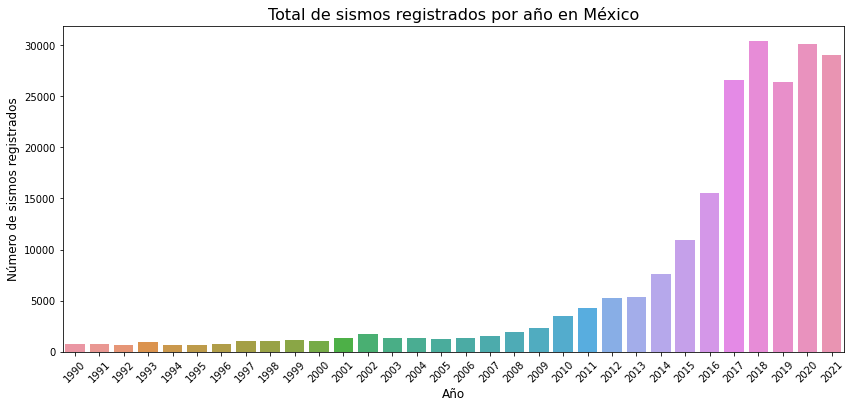

In [124]:
#Para poder apreciar mejor la tabla anterior, preferimos visualizarlos con una gráfica de barras 
fig, ax = plt.subplots(figsize = ( 14 , 6 )) 
plt.xticks(rotation = 45)
sns.barplot(ax = ax, data = sismos_por_anio, x = 'Anio', y = 'No_sismos')
ax.set_xlabel( 'Año' , size = 12 ) 
ax.set_ylabel( 'Número de sismos registrados' , size = 12 ) 
ax.set_title( 'Total de sismos registrados por año en México', size = 16) 
plt.show()


##¿Cual será la cantidad de sismos ocurridos por mes y año en México?

In [127]:
# Agrupamos por año y mes correspondiente, utilizamos la columna 'No_sismos' para poder 
# sumar cada uno de ellos y obtener el total.
agrupacion_sismos = df_sismos.groupby(['Anio','Mes'])[['No_sismos']].sum().reset_index()
agrupacion_sismos 

,Anio,Mes,No_sismos
0,1990,1,89
1,1990,2,88
2,1990,3,88
3,1990,4,77
4,1990,5,56
...,...,...,...
379,2021,8,2026
380,2021,9,3196
381,2021,10,2340
382,2021,11,2847


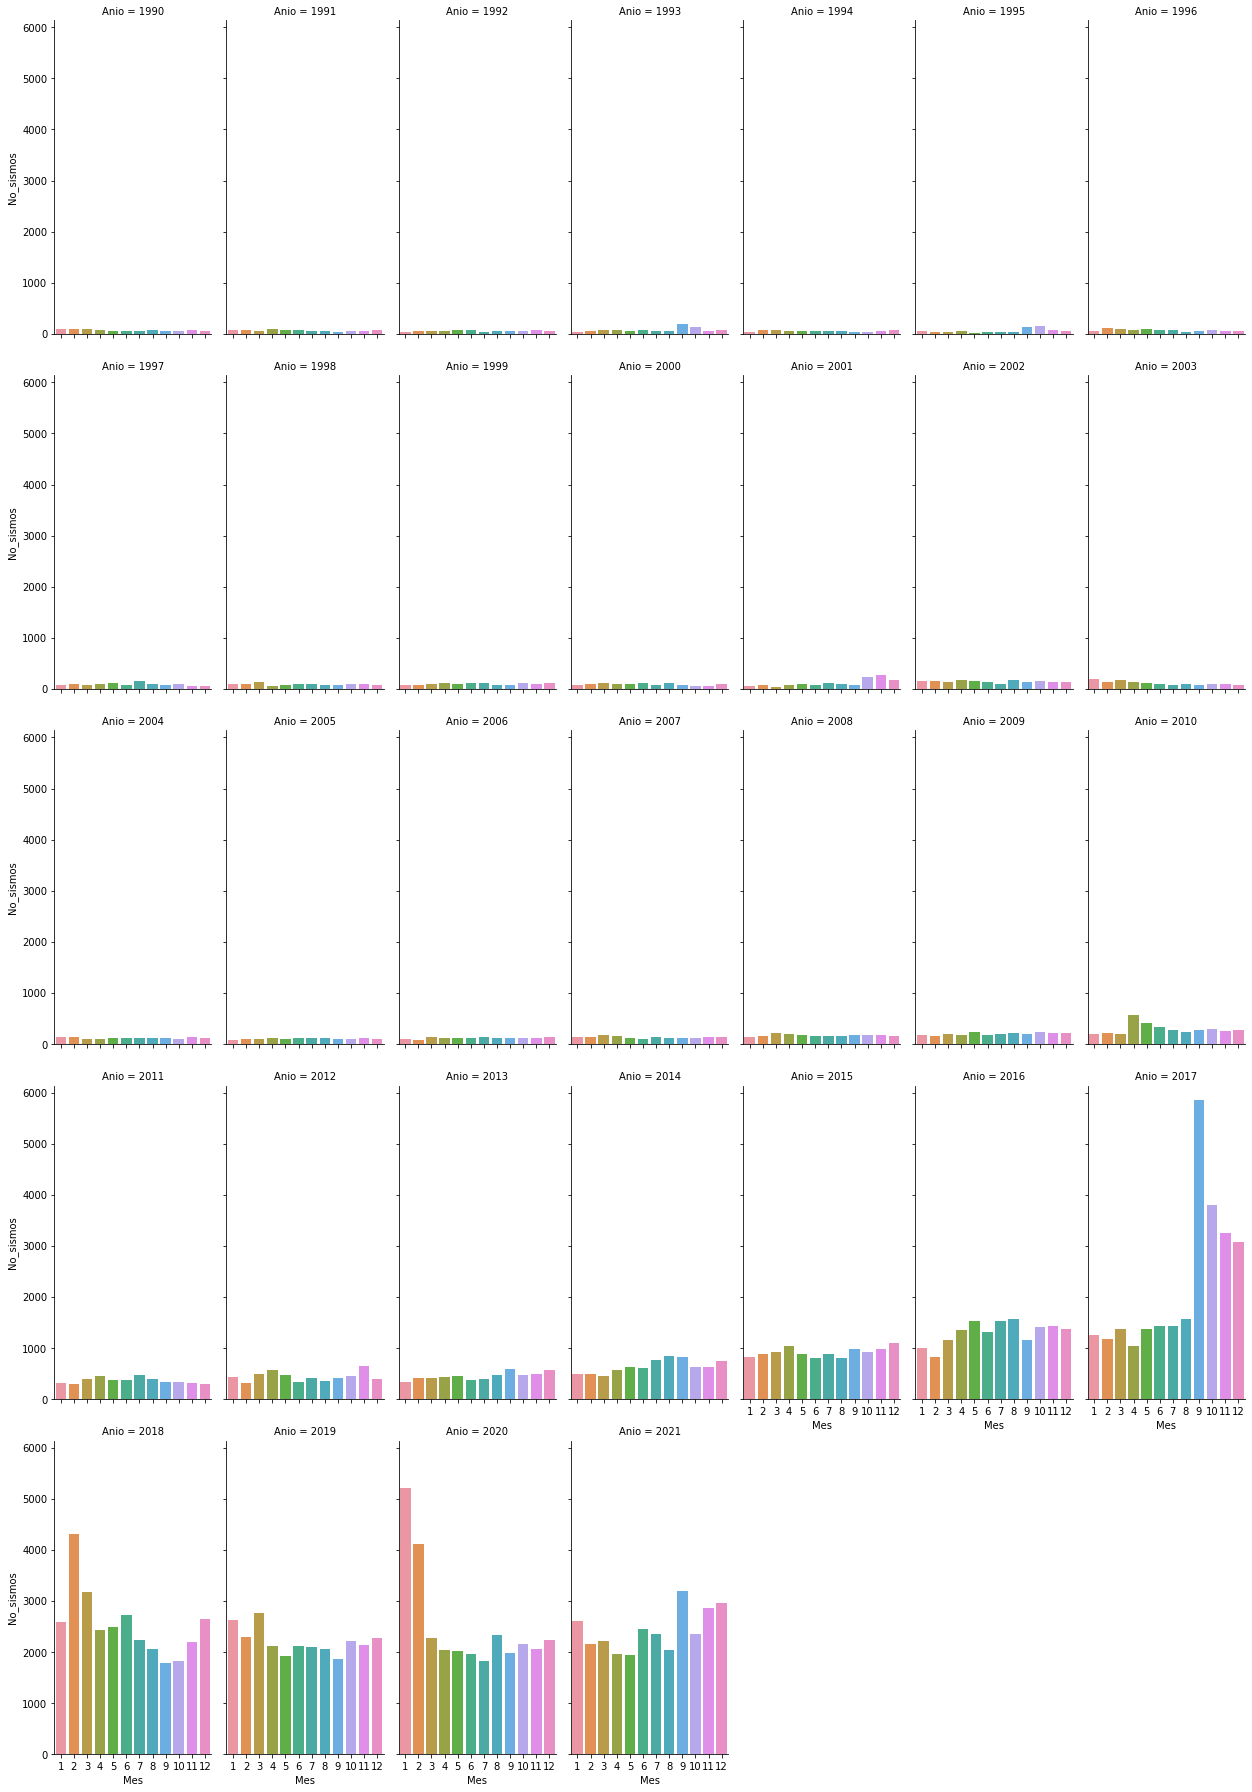

In [133]:
sns.catplot(x='Mes', y ='No_sismos', col='Anio', data = agrupacion_sismos, col_wrap=7,           
            aspect=0.5, kind = 'bar')

Creamos la visulización para poder apreciar los cambios en cada año, pero al hacerlo nos damos cuenta que no es conveniente ya que en el año 2017 se registra una mayor cantidad de sismos en el mes 9 (septiembre)

#¿A que se debe el cambio tan drástico del mes de septiembre en el 2017? 

Si bien es cierto que no podemos predecir los sismos, en la literatura encontramos que en el año 2017 el 7 septiembre se registró un TERREMOTO de 8.2 y las réplicas fueron las causantes de que en ese año se registra una mayor cantidad de sismos en el territorio mexicano.  

In [175]:
df_sismos_2017 = df_sismos[df_sismos.loc[:,'Anio'] == 2017]
df_sismos_2017_09 = df_sismos_2017[df_sismos_2017.loc[:,'Mes'] == 9]
df_sismos_2017_09_07 = df_sismos_2017_09[df_sismos_2017_09['Fecha UTC'].dt.day >=8]
print(df_sismos_2017_09_07.shape)
df_sismos_2017_09_07.head(6)

(5455, 18)


,Anio,Mes,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Referencia,Estado,Anio UTC,Mes UTC,Fecha UTC,Hora UTC,Estatus,No_sismo,No_sismos
86795,2017,9,2017-09-07,19:01:35,3.7,15.9188,-95.9837,65.2,"23 km al NORESTE de CRUCECITA, OAX",23 km al NORESTE de CRUCECITA,OAXACA,2017,9,2017-09-08,00:01:35,revisado,1,1
86796,2017,9,2017-09-07,19:13:33,3.6,16.7935,-93.8643,163.7,"19 km al NOROESTE de CINTALAPA, CHIS",19 km al NOROESTE de CINTALAPA,CHIAPAS,2017,9,2017-09-08,00:13:33,revisado,1,1
86797,2017,9,2017-09-07,19:37:49,3.5,17.1430,-95.3595,63.2,"45 km al NOROESTE de MATIAS ROMERO, OAX",45 km al NOROESTE de MATIAS ROMERO,OAXACA,2017,9,2017-09-08,00:37:49,revisado,1,1
86798,2017,9,2017-09-07,19:54:06,3.8,15.9372,-98.8110,6.7,"93 km al SUROESTE de PINOTEPA NACIONAL, OAX",93 km al SUROESTE de PINOTEPA NACIONAL,OAXACA,2017,9,2017-09-08,00:54:06,revisado,1,1
86799,2017,9,2017-09-07,23:49:17,8.2,14.7610,-94.1030,45.9,"140 km al SUROESTE de PIJIJIAPAN, CHIS",140 km al SUROESTE de PIJIJIAPAN,CHIAPAS,2017,9,2017-09-08,04:49:17,revisado,1,1
86800,2017,9,2017-09-08,00:01:39,4.1,15.4770,-94.8713,30.9,"85 km al SURESTE de SALINA CRUZ, OAX",85 km al SURESTE de SALINA CRUZ,OAXACA,2017,9,2017-09-08,05:01:39,revisado,1,1


Tan solo despues del terremoto de magnitud 8.2 en septiembre se registraron 5451 sismos más, considerados como replicas.

## ¿Cuantos sismos por intervalos en la magnitud se registraron por año?

In [178]:
#Cramos intervalos para agrupar a la magnitud
df_sismos['agrup_mag'] = pd.cut(df_sismos['Magnitud'], bins = [0,3,4,5,6,7,8,9], right =False)

In [179]:
#Realizamos nuestra tabla pivote
pd.pivot_table(df_sismos, index= 'Anio', columns= 'agrup_mag', values = 'No_sismos',aggfunc = ['sum'])

sum                                          
agrup_mag [0, 3) [3, 4) [4, 5) [5, 6) [6, 7) [7, 8) [8, 9)
Anio                                                      
1990          12    247    510     24      2      0      0
1991           2    183    509     29      1      0      0
1992           4    184    398     27      0      0      0
1993          47    274    548     40      5      1      0
1994          20    192    383     24      3      0      0
1995          17    188    438     26      6      2      1
1996           8    203    543     32      2      1      0
1997          44    388    533     34      6      1      0
1998          11    453    532     21      5      0      0
1999          12    542    527     11      4      2      0
2000          28    463    531     18      2      1      0
2001           8    704    585     32      6      0      0
2002           4    880    760     40      4      0      0
2003           5    728    568     18      3      1      0
2004           2    669    639     33      3      0      0
2005           1    678    514     17      0      0      0
2006           0    792    544     19      1      0      0
2007           1    728    764     33      2      0      0
2008           7   1154    780     15      2      0      0
2009           5   1648    610     37      1      0      0
2010          23   2454    954     27      3      1      0
2011          44   3357    839     27      5      0      0
2012          21   4106   1054     50     10      2      0
2013          57   4221   1046     33      4      0      0
2014         238   6365    954     42      7      1      0
2015         251   9056   1605     30      3      0      0
2016         557  13501   1453     29      7      0      0
2017         470  21628   4383     79      2      1      1
2018        1584  25657   3122     41      2      1      0
2019         308  23002   3087     43      2      0      0
2020         309  26756   3029     33      2      1      0
2021         600  25802   2593     33      1      1      0

Podemos ver que una gran cantidad de sismos se encuentran entre los siguientes intervalos [0, 3)	[3, 4)	[4, 5)

## Menciona en que estados de la república se han resgistrado la mayor cantidad de sismos atraves de los años

In [35]:
estado_sismos = df_sismos.groupby(['Estado'])[['No_sismos']].sum()
estado_sismos = estado_sismos.sort_values(by ='No_sismos',ascending = False)
estado_sismos

,No_sismo
Estado,
OAXACA,92644
GUERRERO,38446
CHIAPAS,37901
MICHOACAN,13455
BAJA CALIFORNIA,8276
JALISCO,7200
COLIMA,5666
VERACRUZ,4245
BAJA CALIFORNIA SUR,2865


Los estados de la república con mayor actividad sismica son: 

OAXACA	con 92644

GUERRERO con 38446

CHIAPAS con	37901

MICHOACAN con	13455

BAJA CALIFORNIA	con 8276

## ¿Cierto o Falso que Septiembre es el mes de los temblores?

In [180]:
#Realizamos una tabla pivote para agrupar datos por mes y año, para poder realizar un heatmap
sismos_por_mes_y_anio = pd.pivot_table(df_sismos,columns= 'Mes', values = 'No_sismos', index = 'Anio', 
               aggfunc = ['sum'])
sismos_por_mes_y_anio = sismos_por_mes_y_anio.rename(columns = {1:'Enero',2:'Febrero',3:'Marzo',4:'Abril',5:'Mayo',6:'Junio',7:'Julio',
             8:'Agosto',9:'Septiembre',10:'Octubre',11:'Noviembre',12:'Diciembre'})
sismos_por_mes_y_anio 

sum                                                                  \
Mes  Enero Febrero Marzo Abril  Mayo Junio Julio Agosto Septiembre Octubre   
Anio                                                                         
1990    89      88    88    77    56    53    53     65         49      53   
1991    66      78    52    95    64    69    48     49         34      53   
1992    32      52    54    49    67    65    38     50         45      47   
1993    34      43    63    81    60    79    58     58        184     122   
1994    30      72    72    48    51    55    44     54         39      41   
1995    57      36    28    42    17    29    24     35        139     141   
1996    48     104    88    68    85    80    70     41         44      66   
1997    70      84    81    90   111    72   142     90         70      82   
1998    91      95   134    60    75    85    84     65         79      89   
1999    63      80    94   103    90   117   110     74         68     102   
2000    68      94   109    82   100   115    81    108         79      59   
2001    60      72    35    65    97    71   103     95         81     222   
2002   159     151   133   166   152   133    91    165        123     149   
2003   182     135   162   129   110    98    79     94         76      90   
2004   131     124    84   100   109   121   112    119        115      99   
2005    80      99   102   107   101   111   103    108         98     101   
2006    87      80   126   115   115   112   131    118        117     117   
2007   129     139   166   156   108    97   122    112        111     117   
2008   138     152   206   181   165   145   159    142        168     179   
2009   170     161   196   172   220   164   181    208        187     221   
2010   195     206   200   559   406   323   267    226        267     288   
2011   311     290   378   442   367   374   458    394        324     330   
2012   431     315   481   564   471   327   414    351        415     442   
2013   332     413   398   432   438   373   391    475        582     473   
2014   490     481   445   556   616   606   757    837        817     632   
2015   813     874   913  1034   875   807   876    804        967     919   
2016   994     809  1149  1340  1519  1302  1521   1563       1159    1400   
2017  1247    1164  1370  1043  1361  1427  1429   1561       5845    3804   
2018  2586    4316  3165  2430  2487  2711  2228   2060       1786    1820   
2019  2626    2298  2758  2116  1913  2117  2102   2048       1856    2219   
2020  5203    4106  2263  2034  2015  1953  1825   2321       1966    2156   
2021  2610    2161  2214  1946  1932  2452  2347   2026       3196    2340   

                          
Mes  Noviembre Diciembre  
Anio                      
1990        64        60  
1991        53        63  
1992        70        44  
1993        52        81  
1994        50        66  
1995        72        58  
1996        44        51  
1997        52        62  
1998        99        66  
1999        89       108  
2000        60        88  
2001       268       166  
2002       129       137  
2003       100        68  
2004       124       108  
2005       107        93  
2006       113       125  
2007       135       136  
2008       172       151  
2009       206       215  
2010       257       268  
2011       316       288  
2012       637       395  
2013       490       564  
2014       622       748  
2015       973      1090  
2016      1429      1362  
2017      3241      3072  
2018      2186      2632  
2019      2128      2261  
2020      2062      2226  
2021      2847      2959

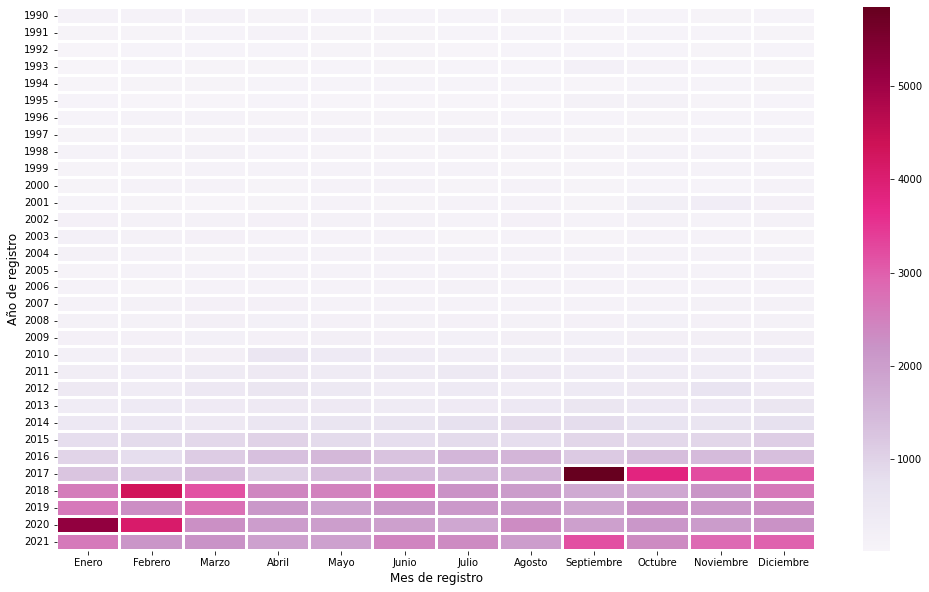

In [181]:
fig, ax = plt.subplots(figsize=(17,10))
sns.heatmap(sismos_por_mes_y_anio, linewidths = 2, cmap='PuRd')
ax.set_xticklabels(labels=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio',
            'Agosto','Septiembre','Octubre','Noviembre','Diciembre'], rotation = 0)
ax.set_xlabel( 'Mes de registro' , size = 12 ) 
ax.set_ylabel( 'Año de registro' , size = 12 ) 
plt.show()

México. Universidad Nacional Autónoma de México, I. d. G., Servicio Sismológico Nacional. (2022). Catálogo de sismos. Extraído de http://www2.ssn.unam.mx:8080/catalogo/